In [127]:
# Data: IMDB movie reviews
# Classify positive / negative (same as day 18)

# Approach: use pre-trained word2vec instead of counts to encode each word into vector

In [128]:
# Word2Vec references:
# https://arxiv.org/pdf/1301.3781.pdf
# https://pdfs.semanticscholar.org/presentation/7ebd/be256766f11c8304ab34c42afe569ffe9776.pdf
# http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [3]:
# conda install gensim cython
import gensim
import gensim.downloader as api

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
info = api.info()
info.keys()

dict_keys(['corpora', 'models'])

In [17]:
info['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [18]:
# model = api.load("glove-twitter-25")
model = api.load("word2vec-google-news-300")

model.most_similar("cat")  # show words that similar to word 'cat'

[('cats', 0.8099379539489746),
 ('dog', 0.7609457969665527),
 ('kitten', 0.7464984655380249),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150583267211914),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931377410889),
 ('chihuahua', 0.6709762215614319)]

In [19]:
model.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204219460487366),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864823460578918),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [20]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [21]:
model.distance('man', 'woman')

0.23359877690046482

In [22]:
model.most_similar("man")

[('woman', 0.7664012312889099),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930751800537),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.571636438369751),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196004867554),
 ('men', 0.5489763021469116)]

<IPython.core.display.Javascript object>


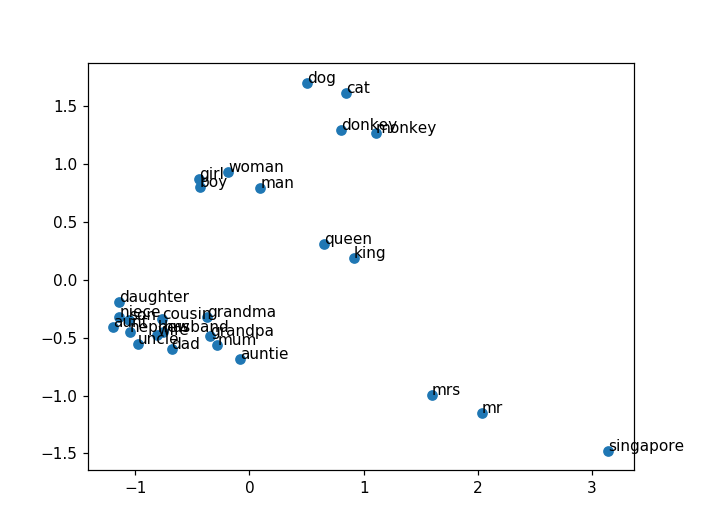

In [23]:
%matplotlib notebook

#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vocab = ['man', 'woman', 'king', 'queen', 'uncle', 'aunt', 'monkey',
         'cat', 'dog', 'mr', 'mrs', 'dad',
         'nephew', 'daughter', 'husband', 'grandma', 'auntie',
         'wife', 'mum', 'grandpa', 'son', 'boy', 'girl',
         'niece', 'donkey', 'cousin', 'singapore']

vectors = []
for v in vocab:
    vectors.append(model[v])

# Apply t-SNE
#tsne = TSNE(n_components=2)
#Z = tsne.fit_transform(vectors)
pca = PCA(n_components=2)
Z = pca.fit_transform(vectors)

plt.scatter(Z[:, 0], Z[:, 1])

for word, pos in zip(vocab, Z):
    plt.annotate(word, pos)

In [24]:
# Train LSTM to classify movie reviews (positive / negative reviews)

In [25]:
model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [26]:
model.vocab['boy'].index

597

In [27]:
# Load dataset from IMDB
from keras.datasets import imdb

# load the reviews with the top 3000 words only
# skip top 5 most frequent words (like 'a', 'the'): stop words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000,
                                                      skip_top=5)

Using TensorFlow backend.


17465344/17464789 [==============================] - 6s 0us/step


In [28]:
imdb.load_data??

In [29]:
# Each review is encoded using word count frequency
X_train[0]

[2,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 2,
 66,
 2,
 2,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 2,
 172,
 2,
 1111,
 17,
 546,
 38,
 13,
 447,
 2,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 2,
 1920,
 2,
 469,
 2,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 2,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 2,
 2223,
 2,
 16,
 480,
 66,
 2,
 33,
 2,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 2,
 107,
 117,
 2,
 15,
 256,
 2,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 2,
 2,
 1029,
 13,
 104,
 88,
 2,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 2,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25

In [30]:
# Steps to use Word2Vec
# 1. Convert from frequency (2) into word ('and')
# 2. Convert from word ('and') into Word2Vec index

# If you have raw text input, skip step 1.

# ----------------------------------------------
# 1. Convert from frequency (2) into word ('and')
# Get the word index json from IMDB dataset
text_to_index = imdb.get_word_index()

# maps word index json from term -> index to index -> term
index_to_text = dict((text_to_index[k], k) for k in text_to_index)

# converts first review from index to words 
print('label', y_train[0])
print('review (numbers):', X_train[0])
print('review (words):', " ".join([index_to_text[x] for x in X_train[0]]))

1646592/1641221 [==============================] - 2s 1us/step
label 1
review (numbers): [2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 2, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 2, 172, 112, 167, 2, 336, 385, 39, 2, 172, 2, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 2, 1920, 2, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 2, 2223, 2, 16, 480, 66, 2, 33, 2, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 2, 107, 117, 2, 15, 256, 2, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 2, 2, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 2, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
review 

In [31]:
# 2. Convert from word ('and') into Word2Vec index

def word2idx(model, word):
    return model.vocab[word].index
def idx2word(model, idx):
    return model.index2word[idx]

index = word2idx(model, 'cat')
print(index)
print(idx2word(model, index))

1717
cat


In [32]:
model.index2word[1717]

'cat'

In [33]:
model.vocab['cat']

In [34]:
model['cat'] # vector

array([-0.96419 , -0.60978 ,  0.67449 ,  0.35113 ,  0.41317 , -0.21241 ,
        1.3796  ,  0.12854 ,  0.31567 ,  0.66325 ,  0.3391  , -0.18934 ,
       -3.325   , -1.1491  , -0.4129  ,  0.2195  ,  0.8706  , -0.50616 ,
       -0.12781 , -0.066965,  0.065761,  0.43927 ,  0.1758  , -0.56058 ,
        0.13529 ], dtype=float32)

In [35]:
# Similar to day 18 - RNN, we'll have to pick 
# a review length, using the average length of reviews.

import numpy as np
lengths = np.array([len(X_train[i]) for i in range(len(X_train))])

# to find out what window size to use
# we'll have to tune this for speeding up training or improving accuracy
window_size = int(np.mean(lengths))
window_size

238

In [36]:
# Steps to use Word2Vec
# 1. Convert from frequency (2) into word ('and')
# 2. Convert from word ('and') into Word2Vec index
# If you have raw text input, skip step 1.

# Helper function to convert from IMDB index to Word2Vec index
def get_word2vec_index(word2vec_model, X, max_sentence_len):

    Z = np.zeros([len(X), max_sentence_len], dtype=np.int32)

    for i, sentence in enumerate(X):
        t = 0
        
        for word in sentence:
            # 1. Get the word from IMDB index
            # Skip this part if you have raw text
            word = index_to_text[word]

            # 2. Get the Word2Vec index from the word
            if word in word2vec_model.vocab:
                Z[i, t] = word2idx(word2vec_model, word)
                t += 1

            # truncate to max_sentence_len
            if t == max_sentence_len:
                break
    return Z
      

Z_train = get_word2vec_index(model, X_train, window_size)
Z_test = get_word2vec_index(model, X_test, window_size)

print(Z_train.shape)
print(Z_test.shape)

(25000, 238)
(25000, 238)


In [37]:
'70s' in model.vocab # some words are not in the vocab
# We can either
# 1. Skip the word
# 2. Replace with <NA>

False

In [38]:
np.array(X_train[0]) # before conversion from IMDB indices

array([   2,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
          2,   66,    2,    2,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          2,  172,  112,  167,    2,  336,  385,   39,    2,  172,    2,
       1111,   17,  546,   38,   13,  447,    2,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    2, 1920,    2,  469,    2,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          2,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    2, 2223,    2,
         16,  480,   66,    2,   33,    2,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    2,  107,  117,    2,   15,  256,    2,    2,    7,
          2,    5,  723,   36,   71,   43,  530,  4

In [39]:
Z_train[0] # after conversion to word2vec indices

array([   26,   124,    15,    58,    99,  3295,  6546,  1049,  1280,
         350,  5800,    26,   260,    26,    26,   670,   133,   632,
          16,    64,   393,    99, 19248,   190,   145,   878,    26,
          33,    55,   533,  2074,    16,   641,    26,   381,   190,
         211,    26,   515,  3638,   153,    26,   381,    26, 12414,
         688,  3157,   168,    93, 10157,    26,   798,   145,    58,
          32,   110,  4872,  1251,   124,    15,    26,   944,    26,
        9237,    26,    15,   285,   282,    45,    58,    99,  3295,
         168,    87,    37,    93,  3889,    26,    15,   688,   692,
         688,    45,    58,  2893,    79,    26,    16,   939,  2644,
          45,    35,  1321,    35,  4966,    16,    26,    26,    58,
         533,   260,    26,   109,    26,   229,    45,    58,   168,
        1507,    16,    64,   290,    92,   133,   164,    86,    64,
       29384,   109,    32,    15,    45,    96,   128,   520,    16,
         124,  7016,

In [40]:
np.array(Z_test[0])

array([   26,  1113,   720,   124,   152,    32, 54092,    10,    10,
          26,    26,    16,    26,  6069,  4936,    26,   313,    26,
         397,  1861,    26,   272,    33, 10071, 10071, 10071,    10,
          10,    93,   240,   290,  1213,    26,   393,    96,  5099,
         124,   152,    70,    56,    26,    75,   619,   868,    35,
         290,   124,  1590,   802,    35,   598,   191,    16,    56,
         896,    58,   367,    26,   168,   172,    64,    26,  4640,
         720,   124,    32, 54092,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [41]:
len(model.vocab)

1193514

In [42]:
# Compare: On Day 18, we used an empty Embedding (trained it from scratch)
#
# Create our RNN model
# from keras.models import Sequential
# from keras.layers import LSTM, Embedding, Dense

# vocab_size = 3000 # this can also be tuned (speed vs. accuracy)
# embedding_size = 50 # another parameter to tune (speed vs. accuracy)
# lstm_output_size = 32 # tune to how many output features

# model = Sequential()
# model.add(Embedding(vocab_size, embedding_size)) # empty!
# model.add(LSTM(64, return_sequences=True))
# model.add(LSTM(32))
# model.add(Dense(lstm_output_size, activation='relu'))
# model.add(Dense(1, activation='sigmoid')) # binary classifier
# model.summary()

In [43]:
# plaidml.keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

embedding_size = 25 # if using "glove-twitter-25"
# embedding_size = 300 # if using "word2vec-google-news-300"
vocab_size = len(model.vocab)
pretrained_weights = model.wv.syn0
lstm_output_size = 32 # tune to how many output features

model_keras = Sequential()
model_keras.add(Embedding(input_dim=vocab_size, output_dim=embedding_size,
                          weights=[pretrained_weights]))
model_keras.add(LSTM(units=embedding_size, return_sequences=True))
model_keras.add(LSTM(32))
model_keras.add(Dense(lstm_output_size, activation='relu'))
model_keras.add(Dense(1, activation='sigmoid')) # binary classifier
model_keras.summary()

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 25)          29837850  
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 25)          5100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                7424      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 29,851,463
Trainable params: 29,851,463
Non-trainable params: 0
_________________________________________________________________


In [44]:
# These are the pre-trained word vectors that we
# pass into the Embedding Layer to be initialized
#
# Unlike in Day 18, where we just used an empty (untrained) 
# Embedding Layer, here we use the Word2Vec mapping
model.wv.syn0

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


array([[ 0.62415 ,  0.62476 , -0.082335, ..., -0.48469 ,  0.40078 ,
         0.75345 ],
       [ 0.69586 , -1.1469  , -0.41797 , ..., -0.67877 ,  0.7061  ,
         0.40833 ],
       [ 1.1242  ,  0.054519, -0.037362, ..., -0.5268  , -0.047166,
         0.71549 ],
       ...,
       [ 2.3229  , -1.8482  , -0.83149 , ..., -1.1397  ,  1.4996  ,
         3.1768  ],
       [-0.44589 , -3.5589  , -0.25854 , ..., -0.67204 ,  3.4037  ,
        -0.16321 ],
       [-2.5807  , -1.0965  , -0.59056 , ...,  1.7123  ,  0.79867 ,
         0.32424 ]], dtype=float32)

In [45]:
# Same as Day 18, we need to do this:
# Feature Engineering: make sure sequences are same length (window_size)
# before feeding into Keras
from keras.preprocessing import sequence

# pads or truncates the sequences
# Note: maybe truncating='post' because earlier words may be
# useful for semantic meaning
# Note: if you are doing text prediction, then later words are
# more useful for prediction
Z_train = sequence.pad_sequences(Z_train, maxlen=window_size)
Z_test = sequence.pad_sequences(Z_test, maxlen=window_size)

print(Z_train.shape)

(25000, 238)


In [46]:
# Train
# Note: no sparse_binary_crossentropy
# For multi-class, try sparse_categorical_crossentropy
model_keras.compile('rmsprop', loss='binary_crossentropy',
                    metrics=['accuracy'])

In [47]:
from keras.callbacks import TensorBoard, EarlyStopping
import time

tensorboard = TensorBoard(log_dir='logs/imdb_lstm_word2vec%d' % time.time())
earlystop = EarlyStopping(patience=1)

history = model_keras.fit(Z_train, y_train, batch_size=32, epochs=5,
                          callbacks=[tensorboard, earlystop],
                          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 296s 15ms/step - loss: 0.6928 - acc: 0.5097 - val_loss: 0.6910 - val_acc: 0.5110
Epoch 2/5
20000/20000 [==============================] - 294s 15ms/step - loss: 0.6719 - acc: 0.5518 - val_loss: 0.6595 - val_acc: 0.5754
Epoch 3/5
20000/20000 [==============================] - 294s 15ms/step - loss: 0.5961 - acc: 0.6904 - val_loss: 0.5471 - val_acc: 0.7588
Epoch 4/5
20000/20000 [==============================] - 295s 15ms/step - loss: 0.5049 - acc: 0.7752 - val_loss: 0.4461 - val_acc: 0.7994
Epoch 5/5
20000/20000 [==============================] - 296s 15ms/step - loss: 0.3852 - acc: 0.8370 - val_loss: 0.3858 - val_acc: 0.8264


In [49]:
# To be continued

# Score
model_keras.evaluate(Z_test, y_test)

# Predict
pred = model_keras.predict_classes(Z_test)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

25000/25000 [==============================] - 101s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     12500
           1       0.80      0.89      0.84     12500

   micro avg       0.83      0.83      0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000

[[ 9645  2855]
 [ 1426 11074]]


In [163]:
# Example of Functional Keras API
# https://keras.io/getting-started/functional-api-guide/
#
# Functional API is more flexible because you can create
# models with multi-input and multi-outputs
#
# But it's more advanced.

from keras.models import Input, Model
from keras.layers import Embedding, LSTM, Dense

embedding_size = 25 # if using "glove-twitter-25"
# embedding_size = 300 # if using "word2vec-google-news-300"
vocab_size = len(model.vocab)
pretrained_weights = model.wv.syn0
lstm_output_size = 32 # tune to how many output features

inputs = Input(shape=(window_size,))
x = Embedding(input_dim=vocab_size, output_dim=embedding_size,
              weights=[pretrained_weights])(inputs)
x = LSTM(units=embedding_size, return_sequences=True)(x)
x = LSTM(32)(x)
x = Dense(lstm_output_size, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes the layers
model_keras_2 = Model(inputs=inputs, outputs=predictions)
model_keras_2.summary()

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds03\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 238)               0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 238, 25)           29837850  
_________________________________________________________________
lstm_11 (LSTM)               (None, 238, 25)           5100      
_________________________________________________________________
lstm_12 (LSTM)               (None, 32)                7424      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 29,851,463
Trainable params: 29,851,463
Non-trainable params: 0
________________________________________________________________

In [164]:
# Train
# Note: no sparse_binary_crossentropy
# For multi-class, try sparse_categorical_crossentropy
model_keras_2.compile('rmsprop', loss='binary_crossentropy',
                    metrics=['accuracy'])

tensorboard = TensorBoard(log_dir='logs/imdb_lstm_word2vec2%d' % time.time())
earlystop = EarlyStopping(patience=1)

history = model_keras_2.fit(Z_train, y_train, batch_size=32, epochs=2,
                          callbacks=[tensorboard, earlystop],
                          validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 458s 23ms/step - loss: 0.6934 - acc: 0.5079 - val_loss: 0.6918 - val_acc: 0.5174
Epoch 2/2
20000/20000 [==============================] - 479s 24ms/step - loss: 0.6893 - acc: 0.5256 - val_loss: 0.6860 - val_acc: 0.5352


In [11]:
# FastText

fasttext = api.load('fasttext-wiki-news-subwords-300')

In [12]:
fasttext.most_similar("uncle")

[('nephew', 0.8700860738754272),
 ('aunt', 0.858253538608551),
 ('great-uncle', 0.8447549343109131),
 ('brother', 0.8296002149581909),
 ('grandfather', 0.8230972290039062),
 ('grand-uncle', 0.8104560375213623),
 ('cousin', 0.8091127276420593),
 ('brother-in-law', 0.8052440881729126),
 ('father', 0.7952302694320679),
 ('niece', 0.7879735231399536)]

In [13]:
fasttext.distance("uncle", "aunt")

0.14174642094878065

In [14]:
fasttext.distance("grandpa", "grandma")

0.16593439273413002

In [15]:
fasttext.distance("man", "woman")

0.1880191581559827